**Brian Blaylock**  

# 🌁 Wildfire Smoke 9 September 2020
## Solar raditation and temperature in Pacific Grove, CA.
There have been major wildfires in the western United States in the fall fo 2020. Pacific Grove, California, is pretty used to days with obscured sunlight becuase it can be foggy. But the thick smoke produced by the fires caused a very eerie day that made national news reporting the [Mars-like atmosphere](https://www.nbcnews.com/news/us-news/scene-mars-skies-parts-california-turn-orange-wildfires-continue-n1239659) we were living in. It was indeed an eerie day with an orange glow coming inside from all the windows.
![image.png](../images/smoke_2020.png)

It is interesting to see how the solar radiation changed throughout the week. Here we get data from Synoptic to look at what one station recorded in Pacific Grove, California, very close to where I live ([EW1554](https://mesowest.utah.edu/cgi-bin/droman/meso_base_dyn.cgi?stn=e1554)). 


In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
from datetime import datetime, timedelta
import pandas as pd

import sys
sys.path.append('../')

from synoptic.services import stations_timeseries

/p/home/blaylock/BB_credentials.cfg


In [154]:
a = stations_timeseries(stid='E1554',
                        vars='solar_radiation,air_temp',
                        start=datetime(2020, 9, 5, 7),
                        end=datetime(2020, 9, 12, 7),
                        obtimezone='local',
                        units='english',
                        verbose='HIDE')


 🚚💨 Speedy Delivery from Synoptic API [timeseries]: https://api.synopticdata.com/v2/stations/timeseries?stid=E1554&vars=solar_radiation,air_temp&start=202009050700&end=202009120700&obtimezone=local&units=english&token=🙈HIDDEN



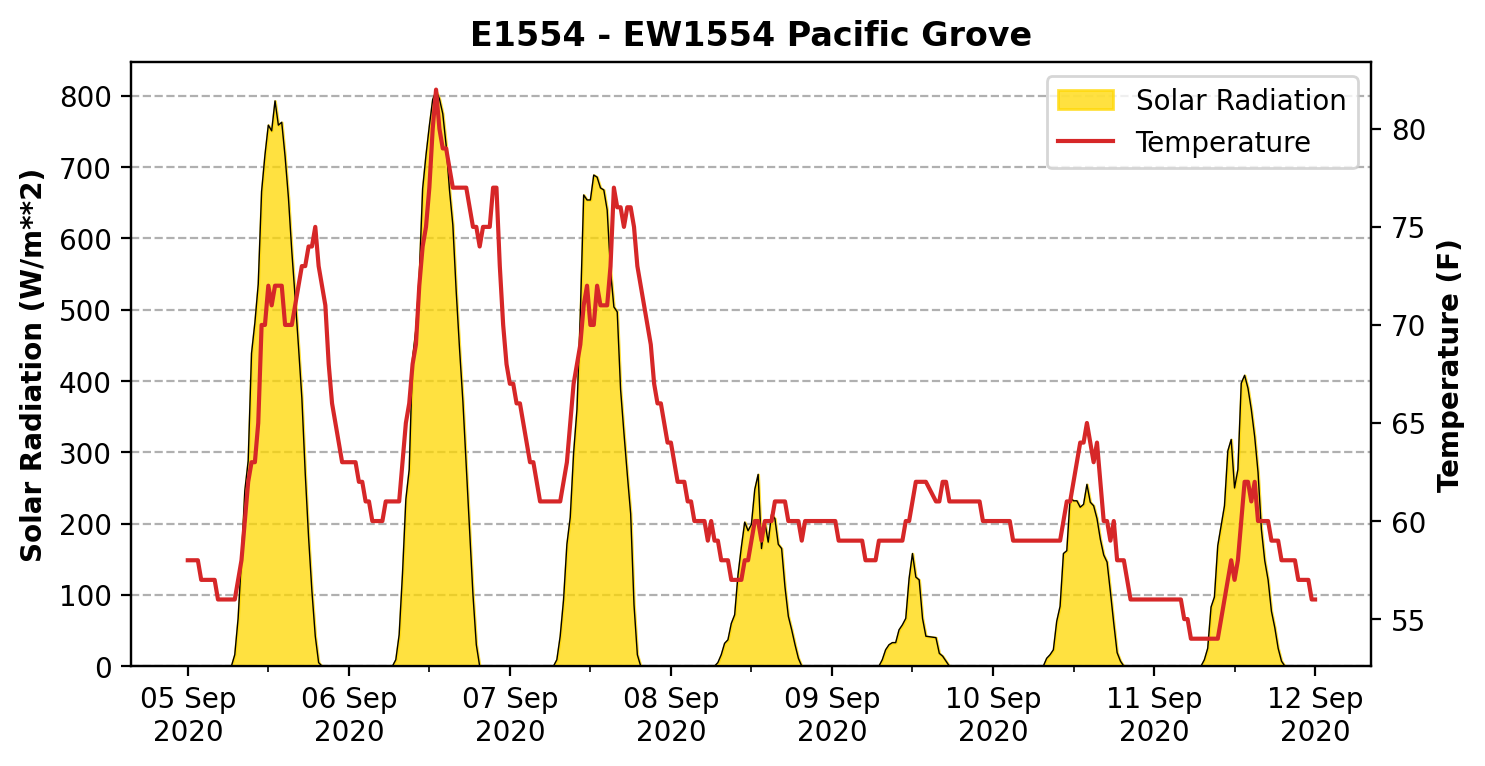

In [155]:
fig, ax1 = plt.subplots(1,1, figsize=[8,4], dpi=200)

# Solar Radiation
p1=ax1.fill_between(a.index.tz_localize(None), a.solar_radiation, color='gold', alpha=.75, zorder=3, label='Solar Radiation')
ax1.plot(a.index.tz_localize(None), a.solar_radiation, color='k', zorder=100, lw=.5)
ax1.grid(linestyle='--', axis='y', zorder=0)

ax1.set_ylabel(f"Solar Radiation ({a.attrs['UNITS']['solar_radiation']})", fontweight='bold')
ax1.set_title(f"{a.attrs['STID']} - {a.attrs['NAME']}", fontweight='bold')
ax1.set_ylim(ymin=0)


# Air Temperature
ax2 = plt.twinx(ax1)
p2 = ax2.plot(a.index.tz_localize(None), a.air_temp, color='tab:red', zorder=100, label='Temperature')

ax2.set_ylabel(f"Temperature ({a.attrs['UNITS']['air_temp'][0]})", fontweight='bold')
ax1.xaxis.set_major_formatter(DateFormatter("%d %b\n%Y"))
ax1.xaxis.set_major_locator(HourLocator([0]))
ax1.xaxis.set_minor_locator(HourLocator([12]))


# Kinda more work than I wanted to get both artists in the same legend...
ax1.legend([p1, p2[0]], [p1.get_label(), p2[0].get_label()])

fig.patch.set_facecolor('white')